In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('/Users/omarelmiujahid/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [104]:
%matplotlib inline


In [4]:
pd.pandas.set_option('display.max_columns',None)

In [163]:
df=pd.read_csv('/Users/omarelmiujahid/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [8]:
df.shape

(1460, 81)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.isna().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [99]:
featurs_with_na=[feauture for feauture in df.columns if df[feauture].isna().sum()>1 ]
len(featurs_with_na)

18

In [46]:
for feauture in featurs_with_na:
    print( feauture , np.round(df[feauture].isna().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.5973
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [47]:
data=df.copy()

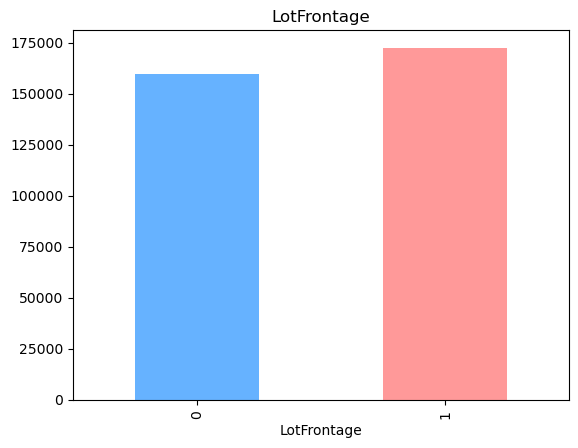

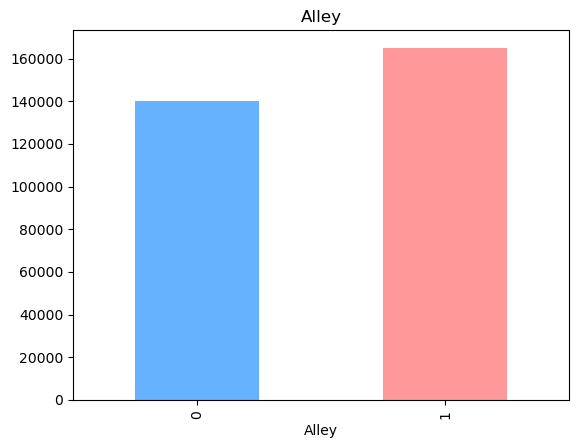

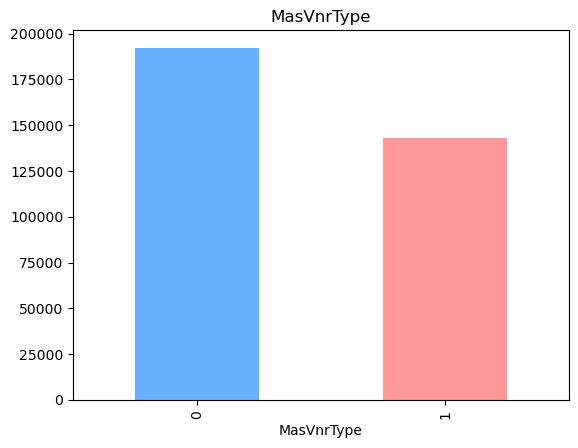

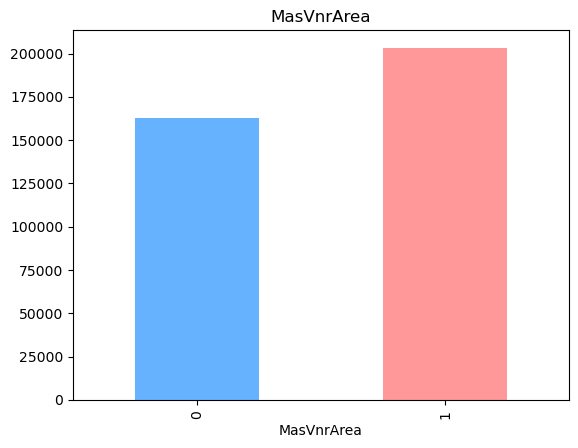

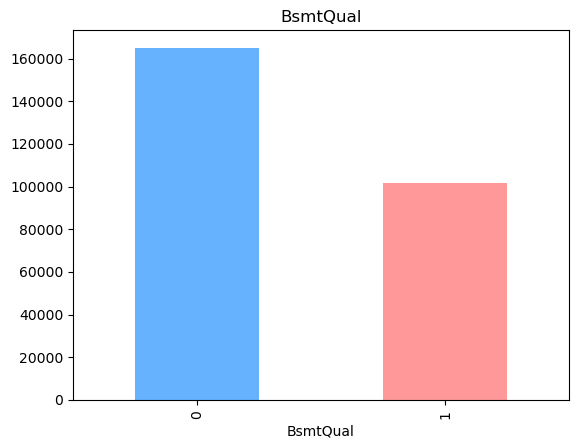

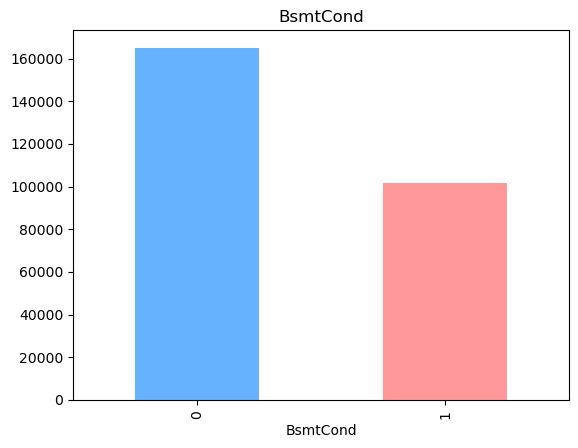

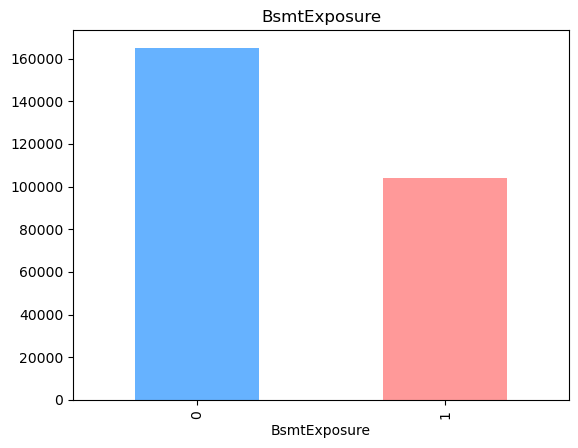

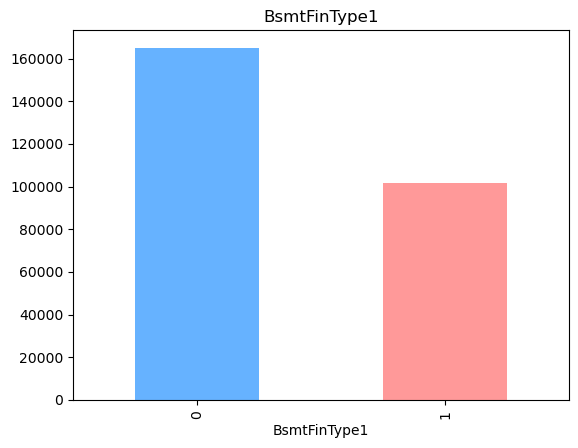

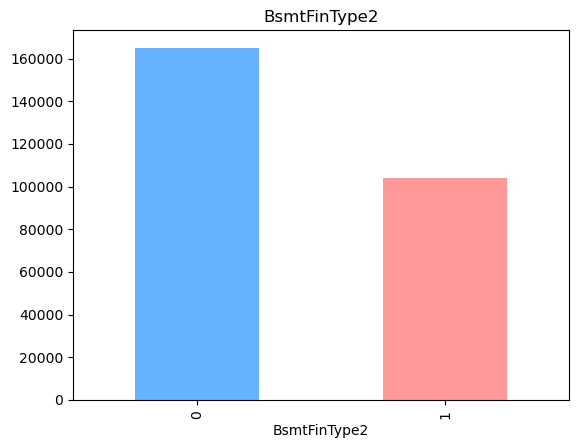

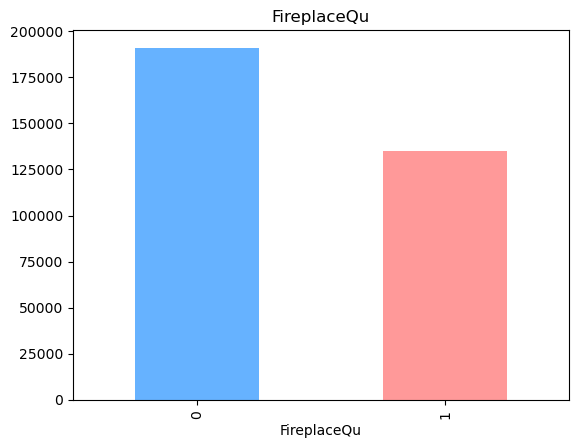

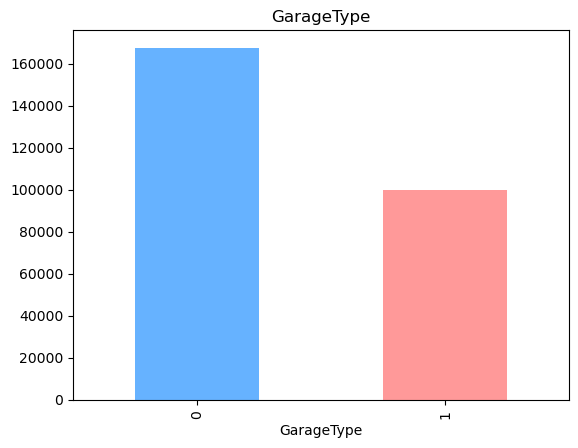

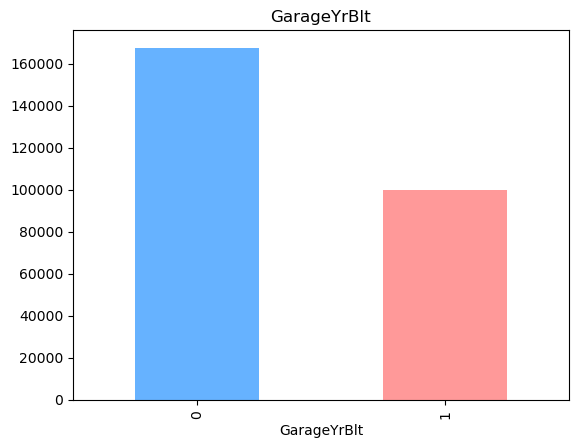

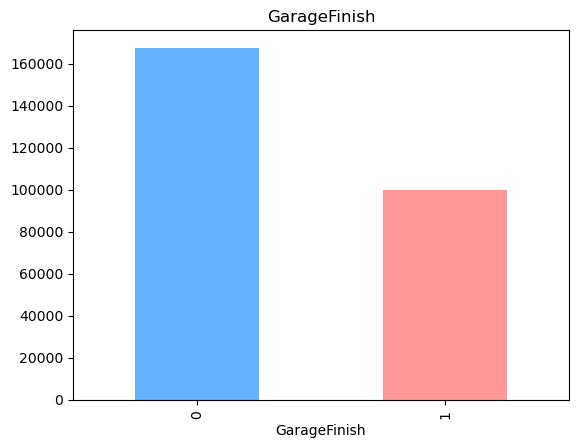

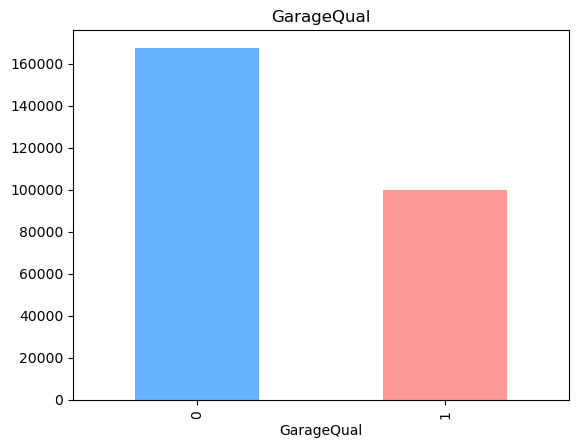

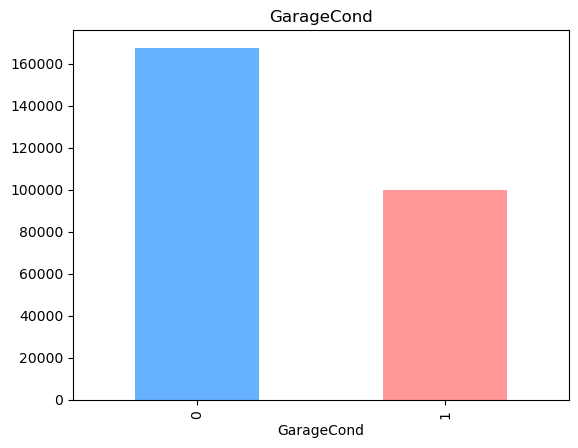

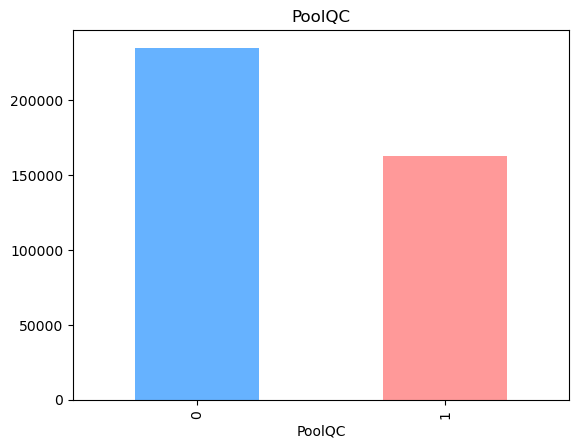

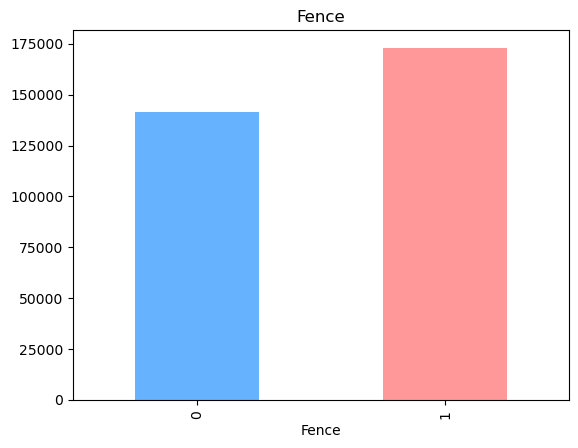

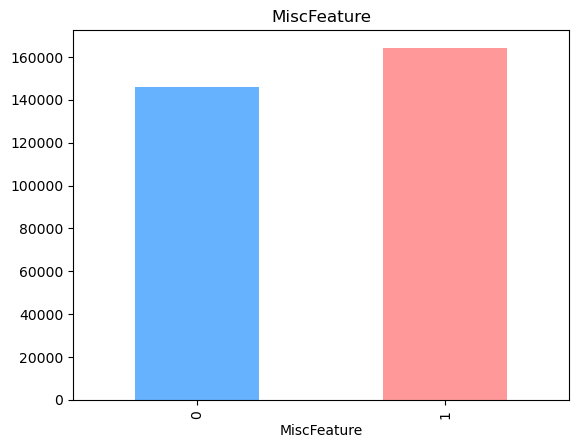

In [48]:
for feauture in featurs_with_na:
    data[feauture]=np.where(data[feauture].isna(),1,0)
    colors = ['#66B2FF','#FF9999']
    data.groupby(feauture)['SalePrice'].median().plot.bar(color=colors)
    plt.title(feauture)
    plt.show()

In [56]:
feature_numerical=[feature for feature in df if df[feature].dtype!='O']
print(len(feature_numerical))
feature_numerical.sort()
feature_numerical

38


['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [53]:
df[feature_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [58]:
date_time_feature=['YrSold','YearBuilt','YearRemodAdd']

In [59]:
date_time_feature

['YrSold', 'YearBuilt', 'YearRemodAdd']

In [62]:
df[date_time_feature].isna().sum()

YrSold          0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [69]:
df[date_time_feature].head()

,YrSold,YearBuilt,YearRemodAdd
0,2008-01-01,2003-01-01,2003-01-01
1,2007-01-01,1976-01-01,1976-01-01
2,2008-01-01,2001-01-01,2002-01-01
3,2006-01-01,1915-01-01,1970-01-01
4,2008-01-01,2000-01-01,2000-01-01


In [71]:
dff[date_time_feature].head()

,YrSold,YearBuilt,YearRemodAdd
0,2008,2003,2003
1,2007,1976,1976
2,2008,2001,2002
3,2006,1915,1970
4,2008,2000,2000


In [68]:
for feature in date_time_feature:
    df[feature]=pd.to_datetime(df[feature],format='%Y')



<Axes: xlabel='YearRemodAdd'>

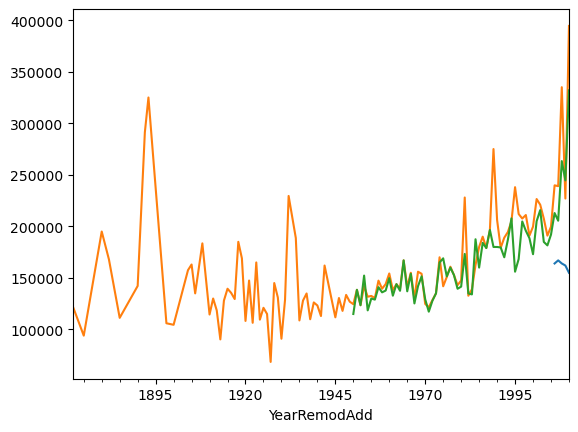

In [76]:
df.groupby('YrSold')['SalePrice'].median().plot()
df.groupby('YearBuilt')['SalePrice'].median().plot()
df.groupby('YearRemodAdd')['SalePrice'].median().plot()

In [101]:
descrite_features=[feature for feature in feature_numerical if len(df[feature].unique()) <25 and feature not in date_time_feature+ ['Id']  ]                                                   
print(len(descrite_features))
descrite_features
                                                                                                    

17


['3SsnPorch',
 'BedroomAbvGr',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Fireplaces',
 'FullBath',
 'GarageCars',
 'HalfBath',
 'KitchenAbvGr',
 'LowQualFinSF',
 'MSSubClass',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'TotRmsAbvGrd']

In [102]:
df[descrite_features].head()

,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,HalfBath,KitchenAbvGr,LowQualFinSF,MSSubClass,MiscVal,MoSold,OverallCond,OverallQual,PoolArea,TotRmsAbvGrd
0,0,3,1,0,0,2,2,1,1,0,60,0,2,5,7,0,8
1,0,3,0,1,1,2,2,0,1,0,20,0,5,8,6,0,6
2,0,3,1,0,1,2,2,1,1,0,60,0,9,5,7,0,6
3,0,3,1,0,1,1,3,0,1,0,70,0,2,5,7,0,7
4,0,4,1,0,1,2,3,1,1,0,60,0,12,5,8,0,9


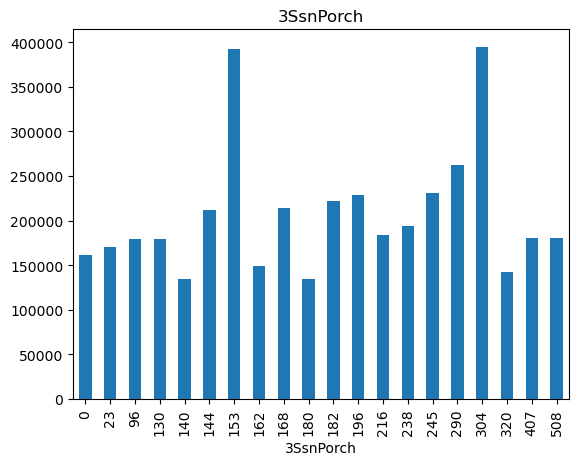

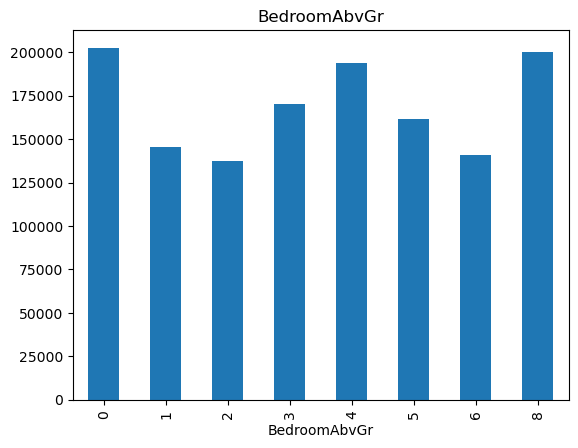

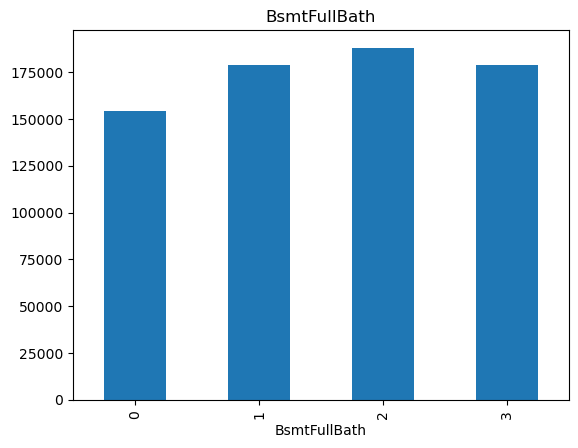

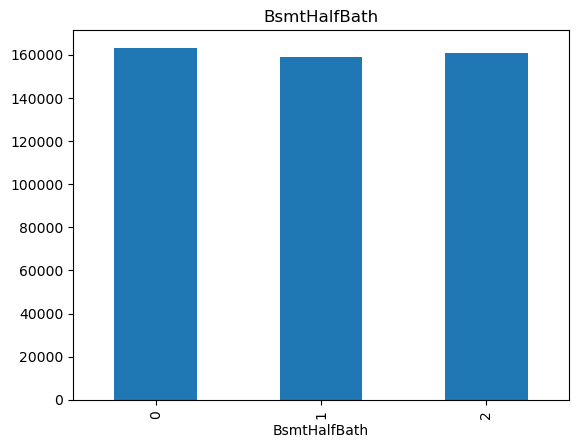

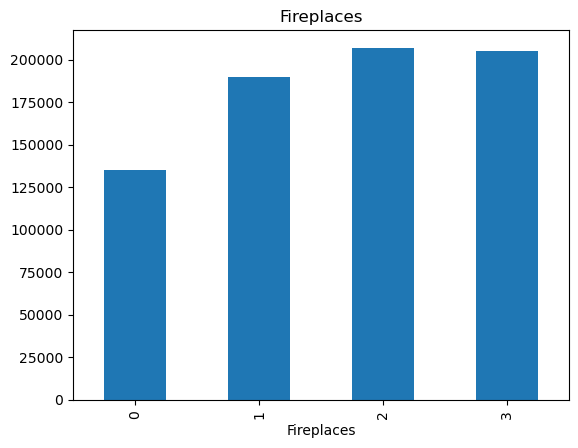

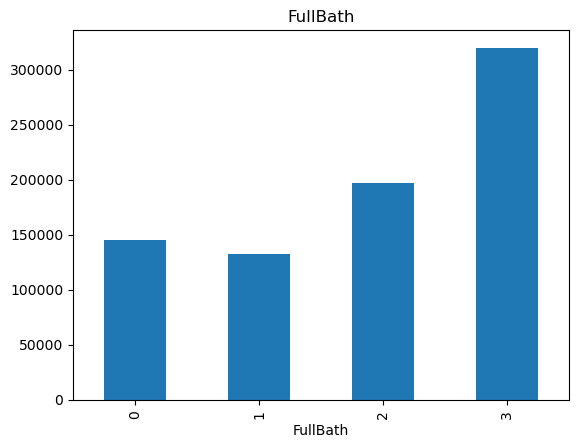

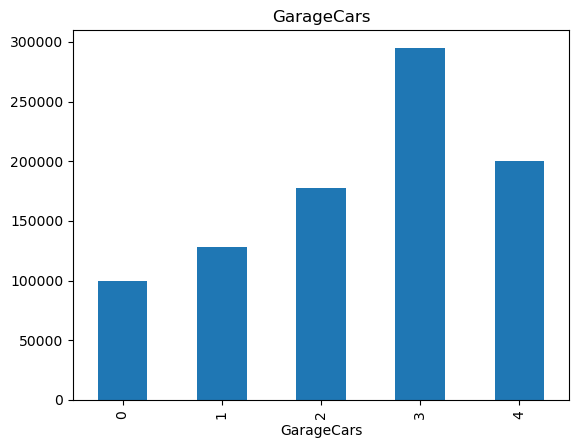

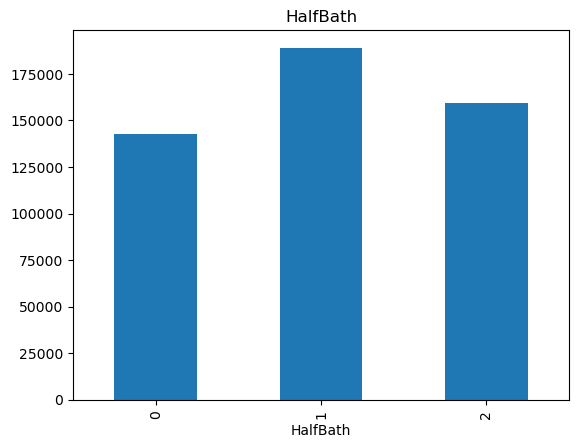

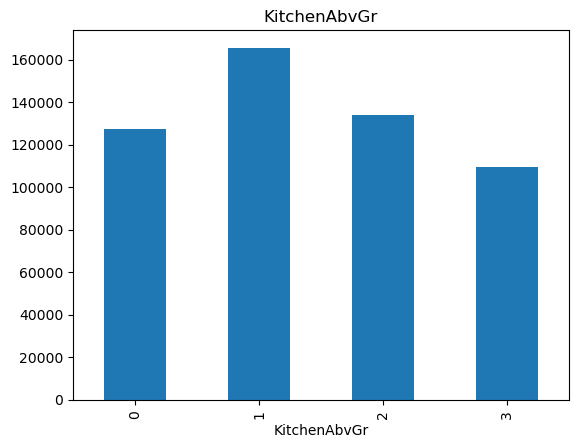

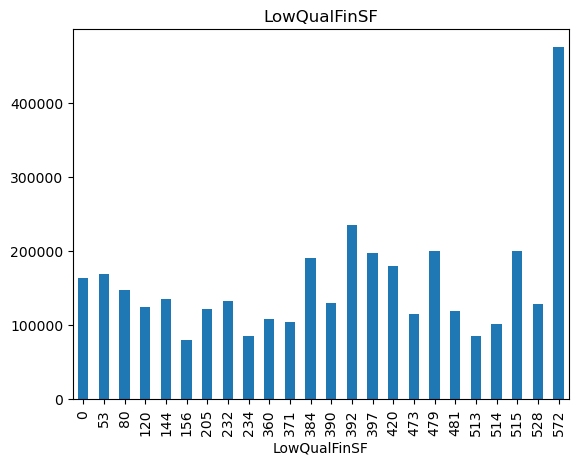

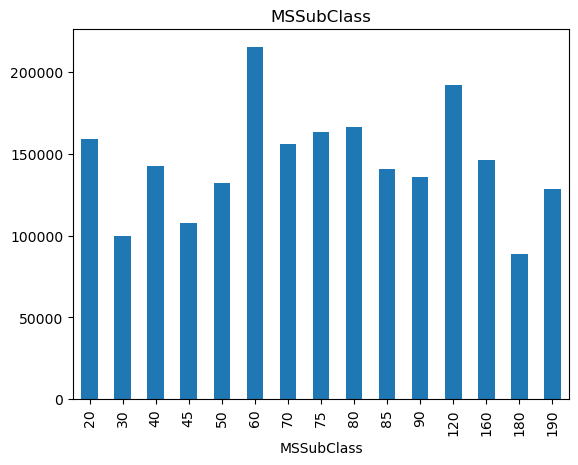

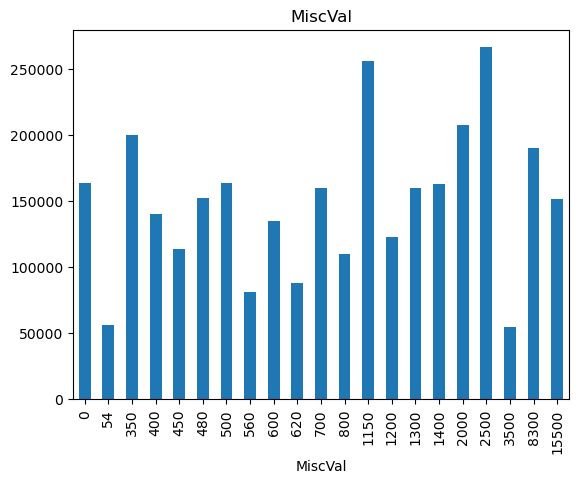

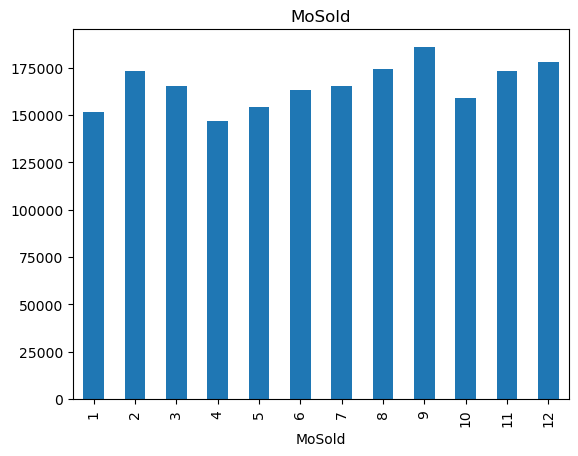

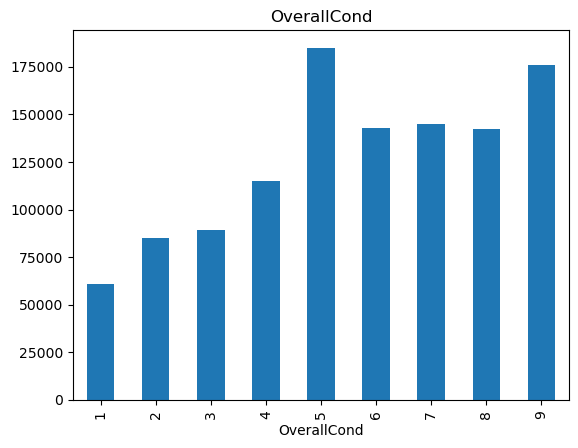

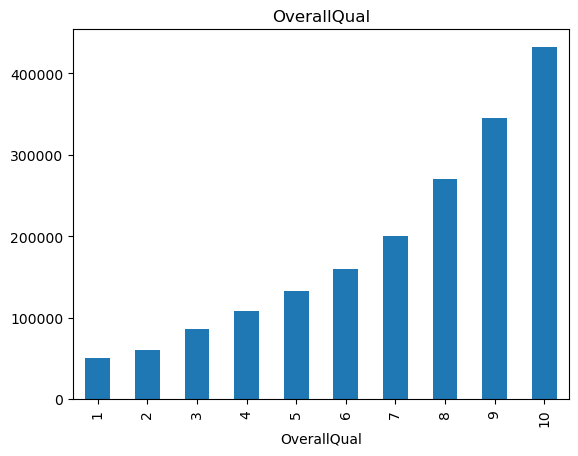

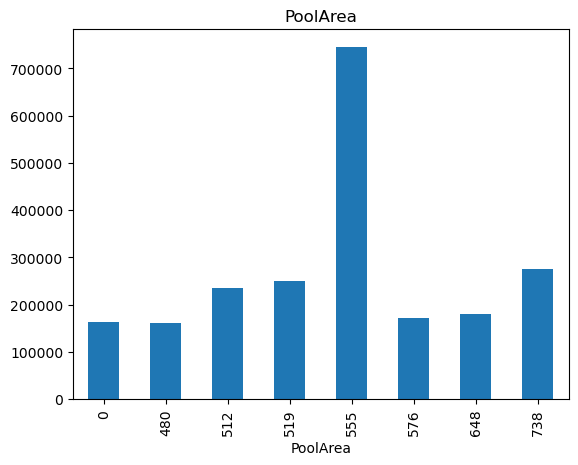

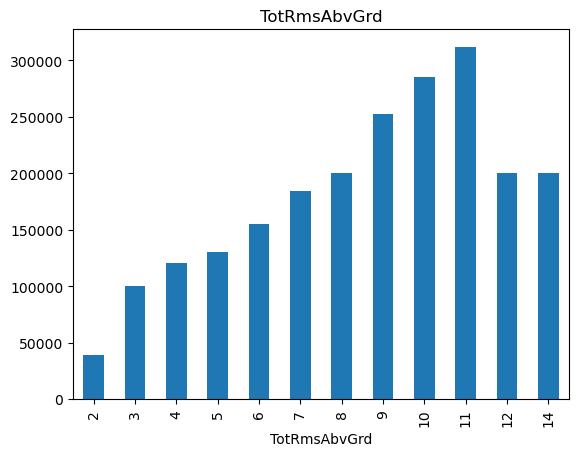

In [105]:
for feature in descrite_features :
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [120]:
integare_features=[feature for feature in feature_numerical if feature not in descrite_features + ['Id'] +  date_time_feature  ]                                                   
print(len(integare_features))
integare_features                                                                            

17


['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF']

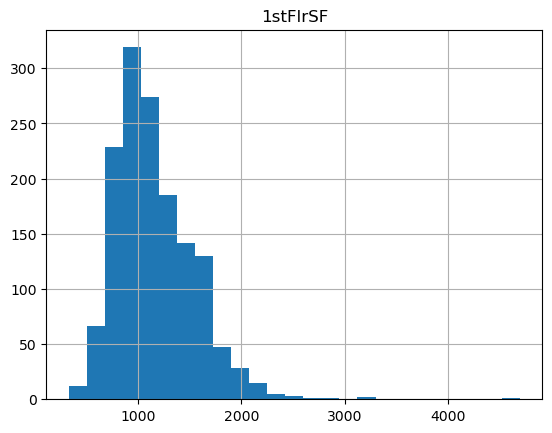

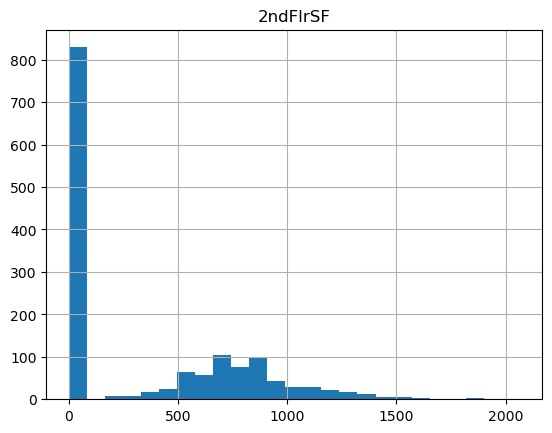

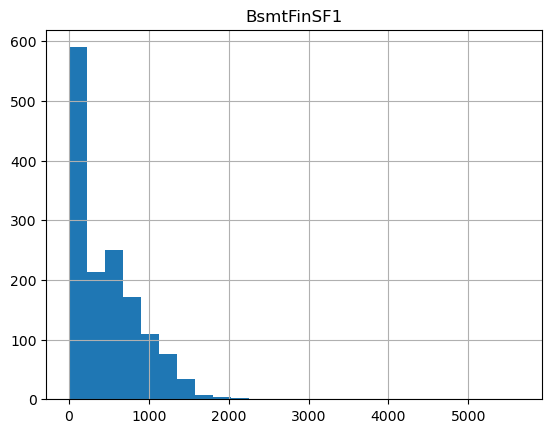

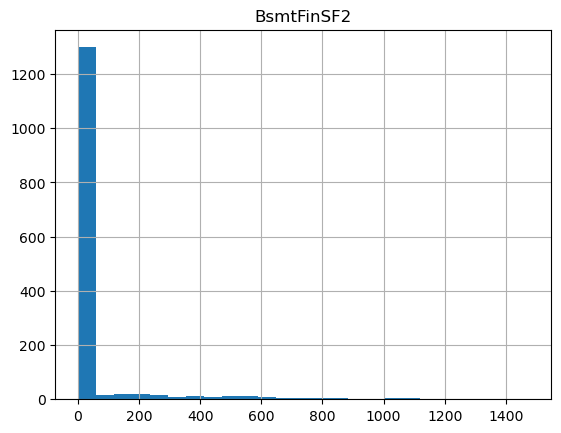

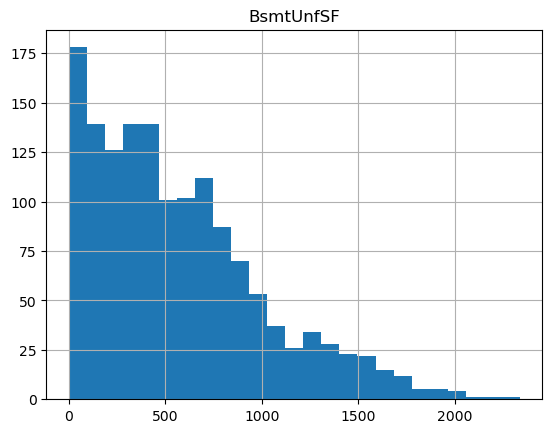

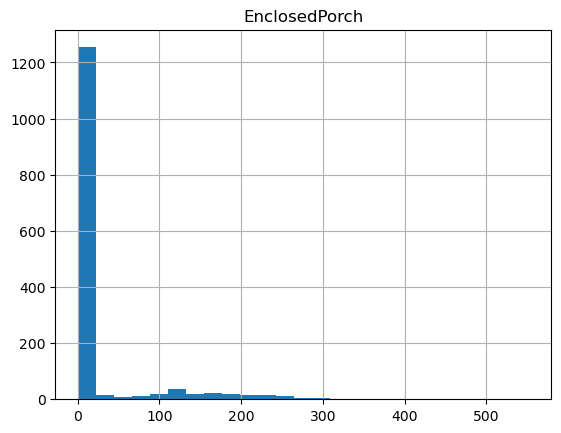

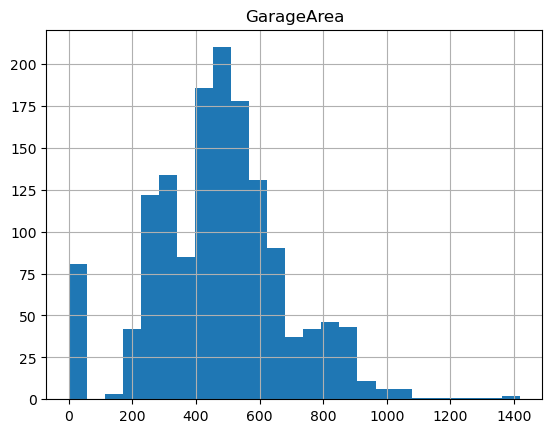

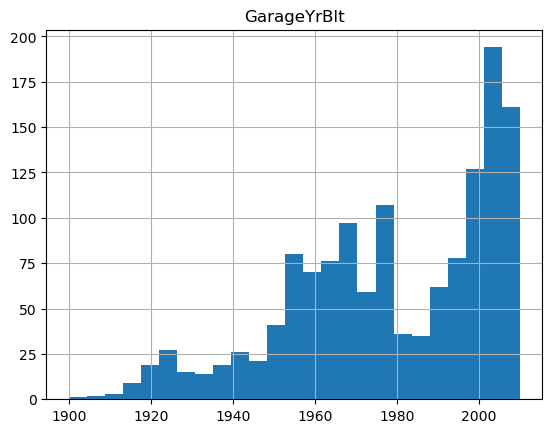

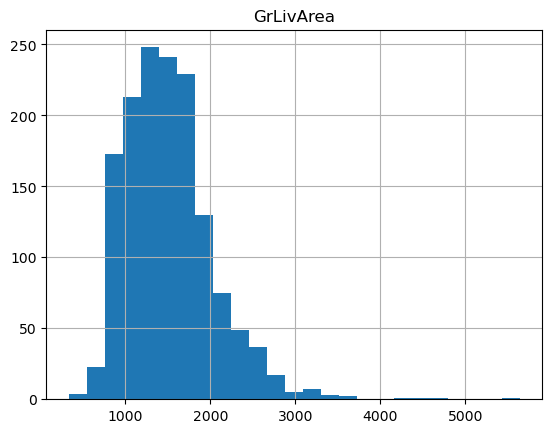

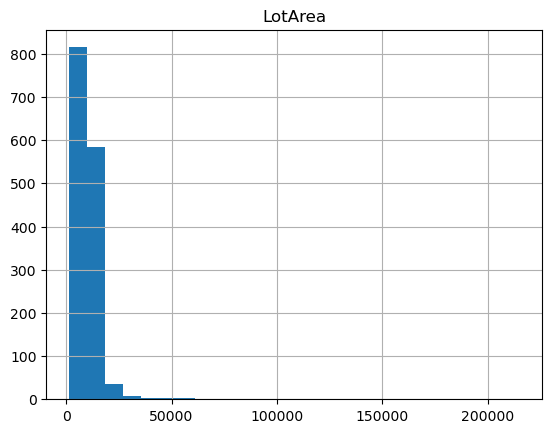

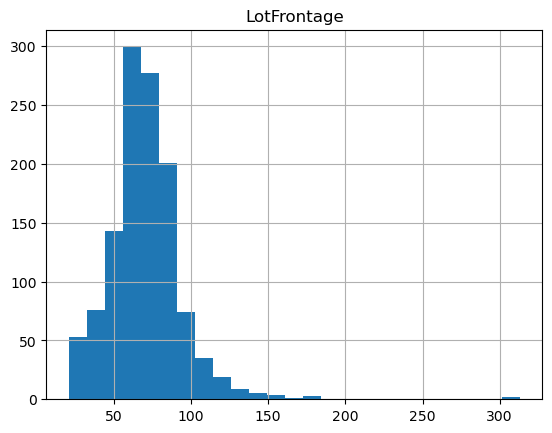

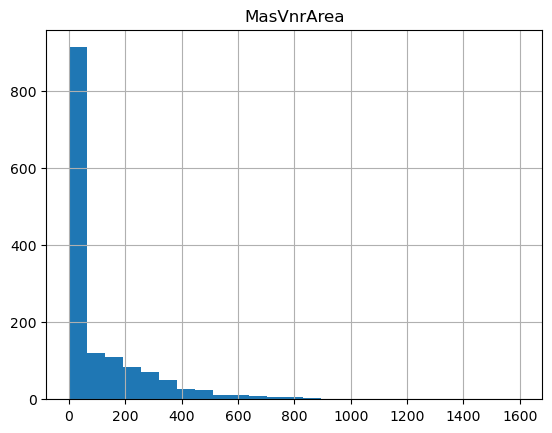

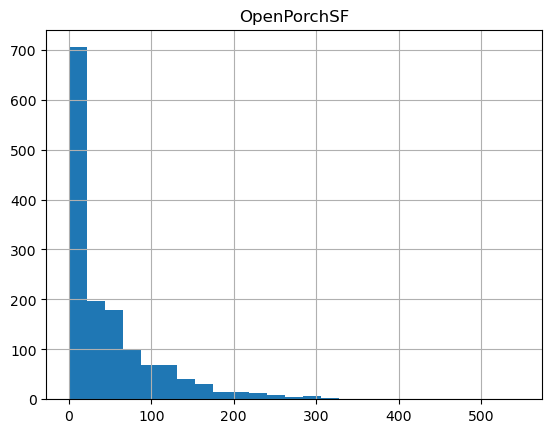

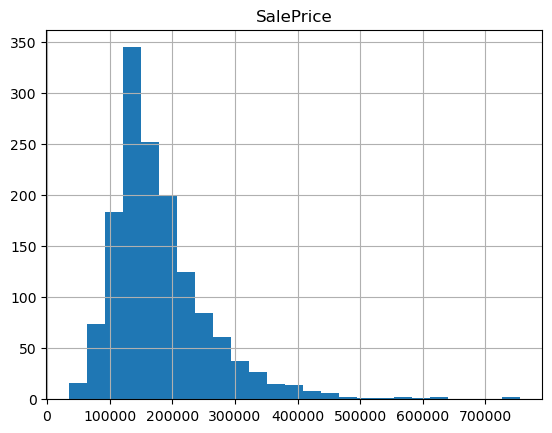

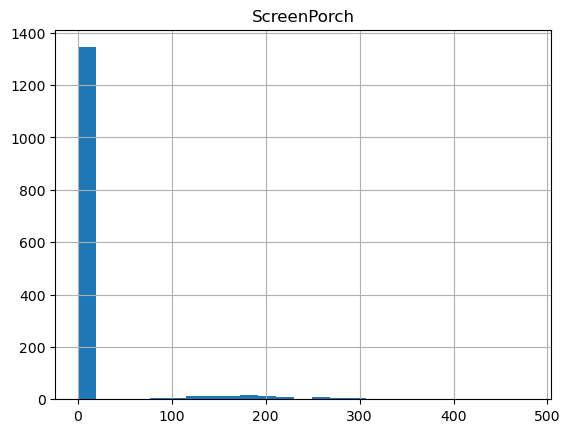

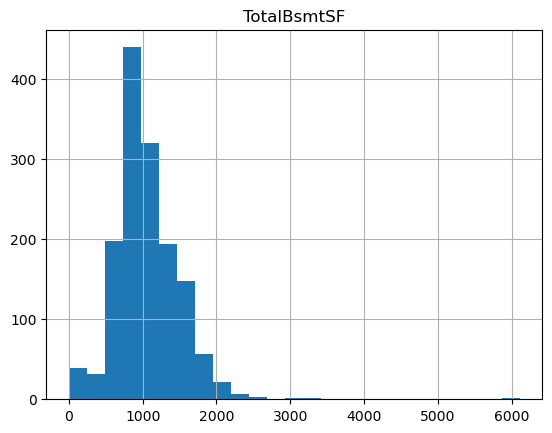

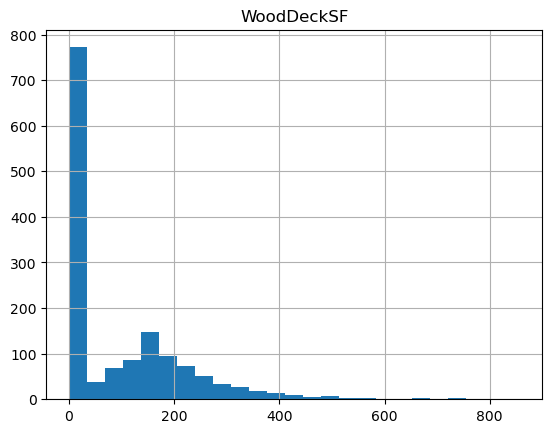

In [121]:
for feauture in integare_features:
    data= df.copy()
    data[feauture].hist(bins=25)
    plt.title(feauture)
    plt.show()

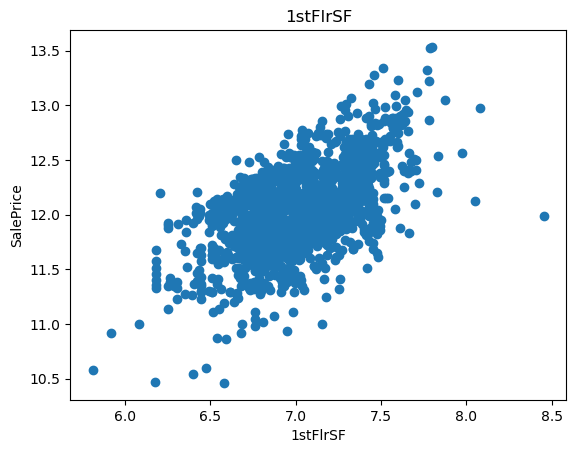

2ndFlrSF
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
EnclosedPorch
GarageArea


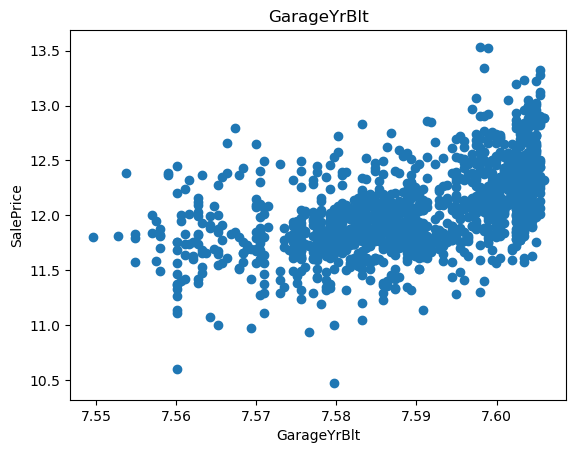

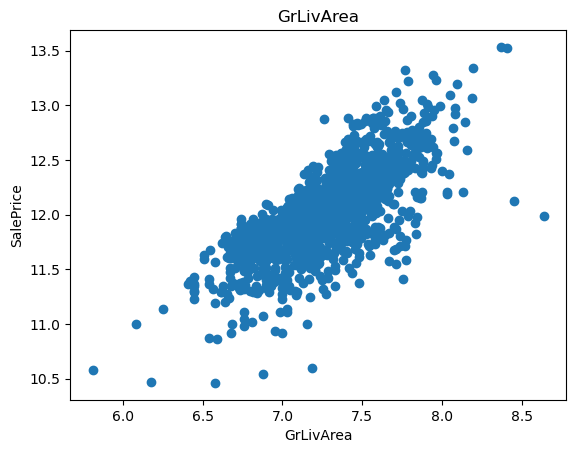

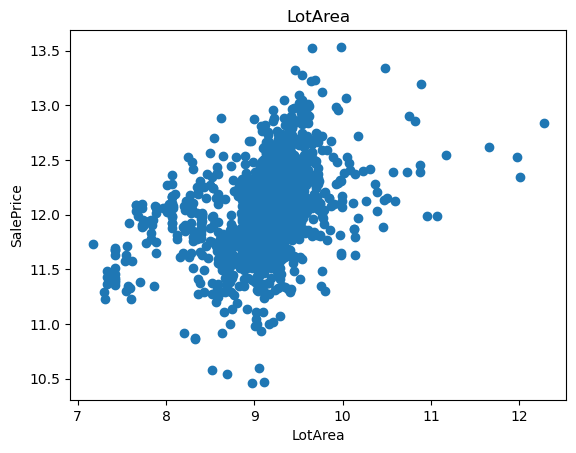

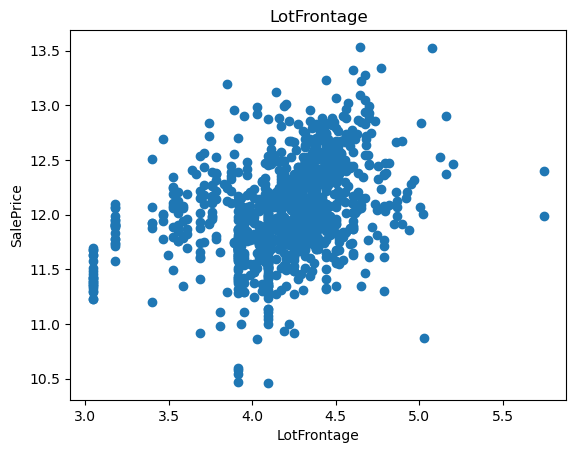

MasVnrArea
OpenPorchSF


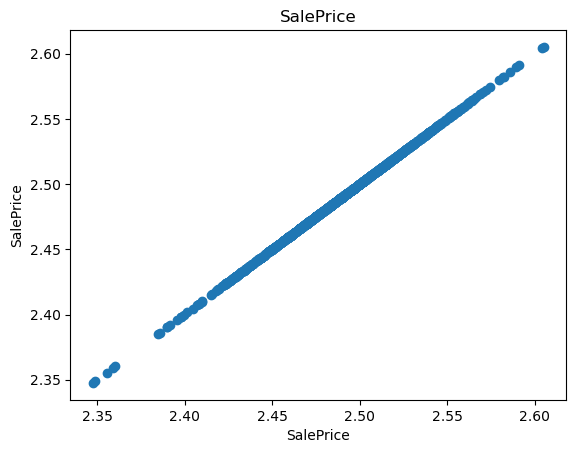

ScreenPorch
TotalBsmtSF
WoodDeckSF


In [131]:
for feuture in integare_features:
    data=df.copy()
    if 0 in data[feuture].unique():
        print(feuture)
        pass
    else:
        data[feuture] = np.log(data[feuture])  
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feuture],data['SalePrice'])
        plt.xlabel(feuture)
        plt.ylabel('SalePrice')
        plt.title(feuture)
        plt.show()

In [132]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

### Outliers

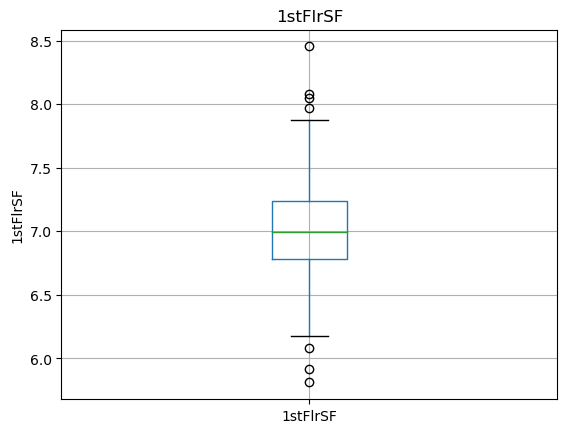

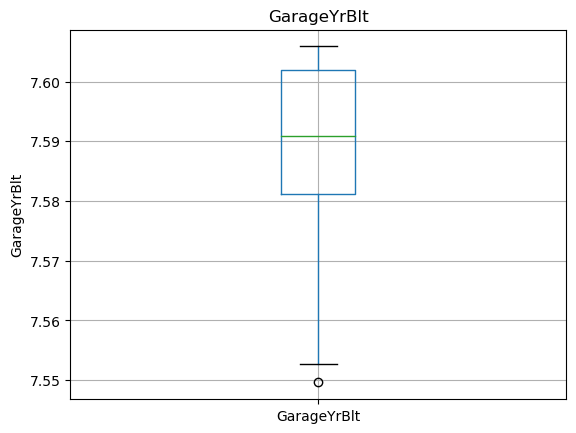

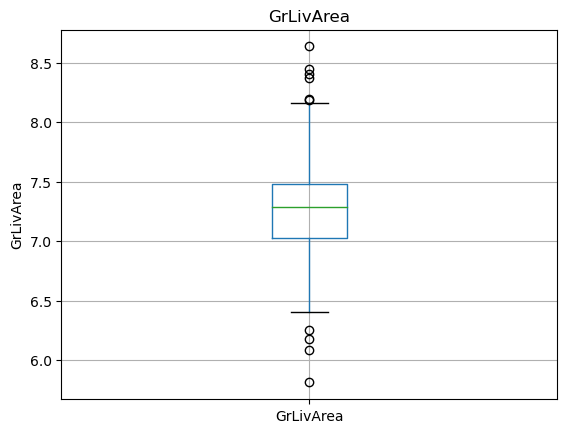

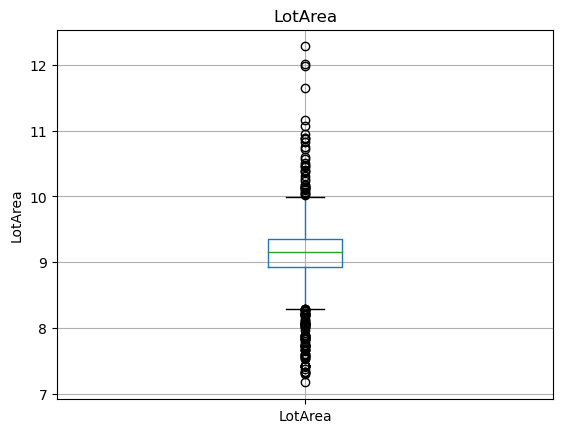

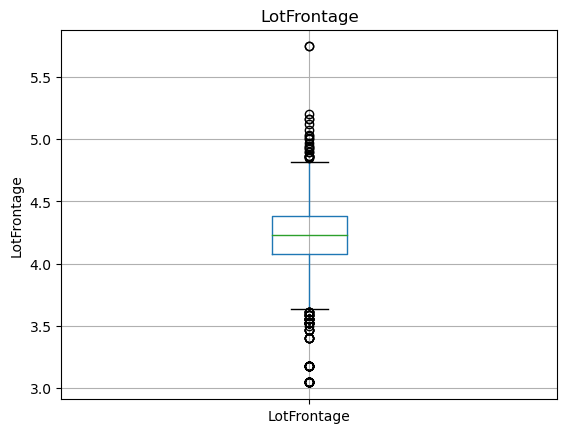

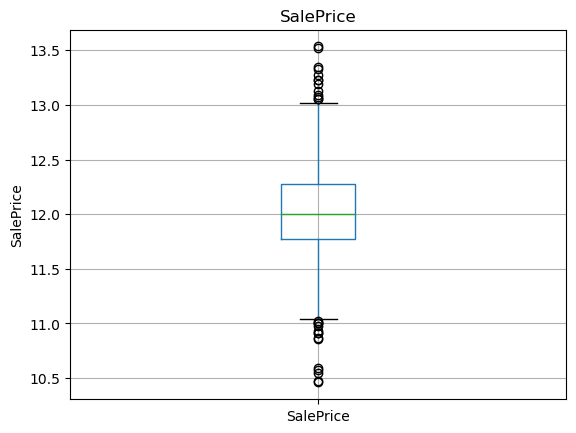

In [135]:
for feuture in integare_features:
    data=df.copy()
    if 0 in data[feuture].unique():
        pass
    else:
        data[feuture] = np.log(data[feuture])  
        data.boxplot(column=feuture)
        plt.ylabel(feuture)
        plt.title(feuture)
        plt.show()

In [137]:
String_feuture=[feuture for feuture in df.columns if df[feuture].dtype=='O'  ]



In [139]:
len(String_feuture)

43

In [140]:
df[String_feuture].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [145]:
for feuture in String_feuture:
    print( 'the {} feuture has {} '.format(feuture,len(df[feuture].unique()) ))
    

the MSZoning feuture has 5 
the Street feuture has 2 
the Alley feuture has 3 
the LotShape feuture has 4 
the LandContour feuture has 4 
the Utilities feuture has 2 
the LotConfig feuture has 5 
the LandSlope feuture has 3 
the Neighborhood feuture has 25 
the Condition1 feuture has 9 
the Condition2 feuture has 8 
the BldgType feuture has 5 
the HouseStyle feuture has 8 
the RoofStyle feuture has 6 
the RoofMatl feuture has 8 
the Exterior1st feuture has 15 
the Exterior2nd feuture has 16 
the MasVnrType feuture has 4 
the ExterQual feuture has 4 
the ExterCond feuture has 5 
the Foundation feuture has 6 
the BsmtQual feuture has 5 
the BsmtCond feuture has 5 
the BsmtExposure feuture has 5 
the BsmtFinType1 feuture has 7 
the BsmtFinType2 feuture has 7 
the Heating feuture has 6 
the HeatingQC feuture has 5 
the CentralAir feuture has 2 
the Electrical feuture has 6 
the KitchenQual feuture has 4 
the Functional feuture has 7 
the FireplaceQu feuture has 6 
the GarageType feuture ha

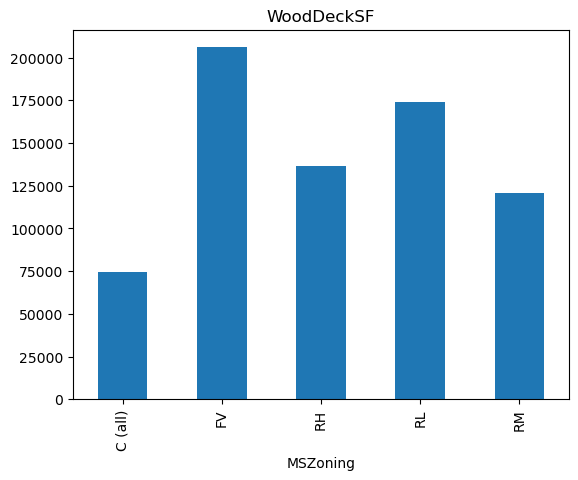

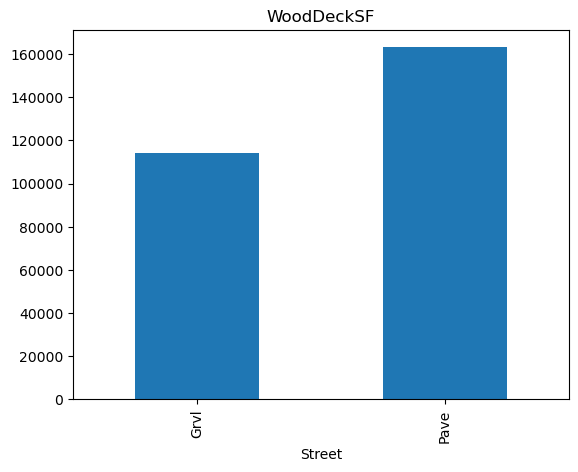

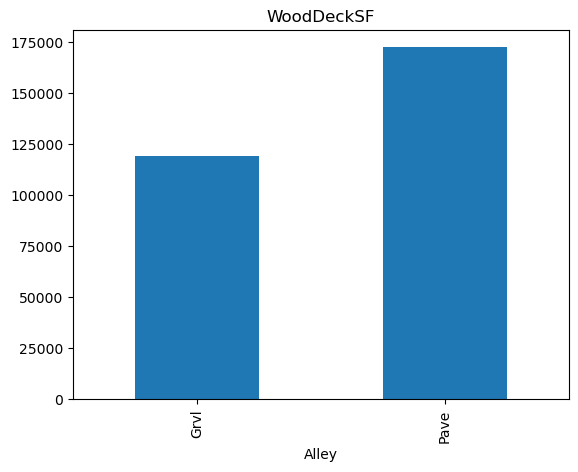

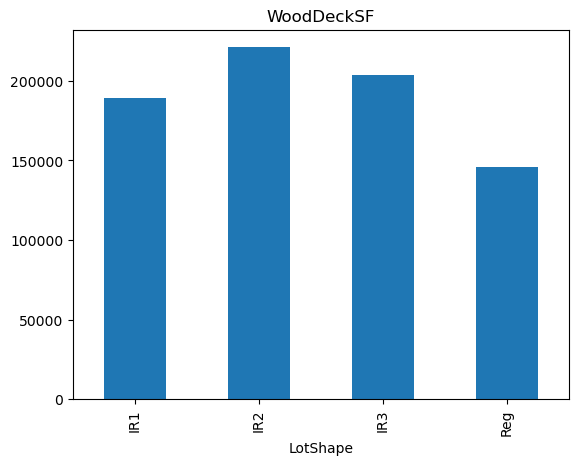

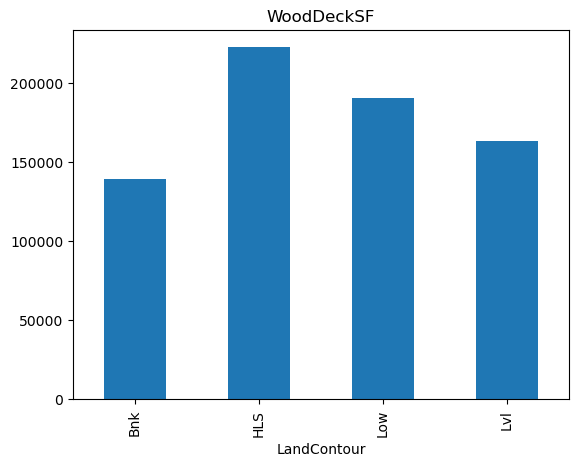

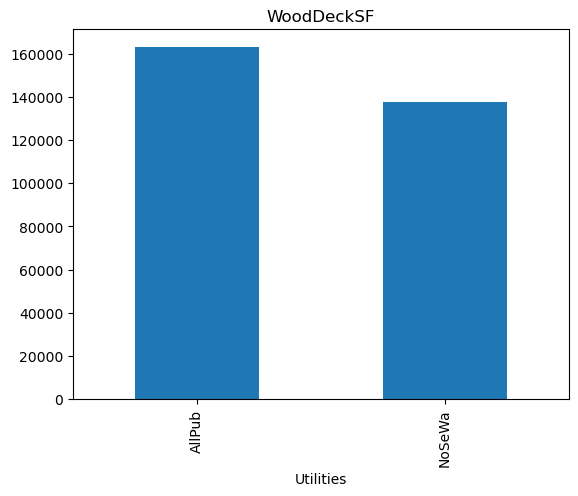

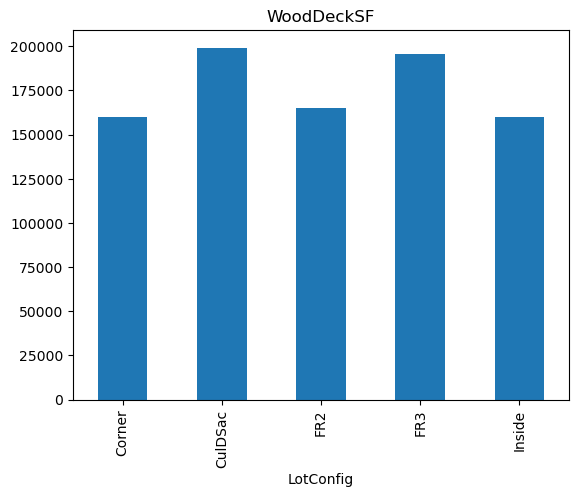

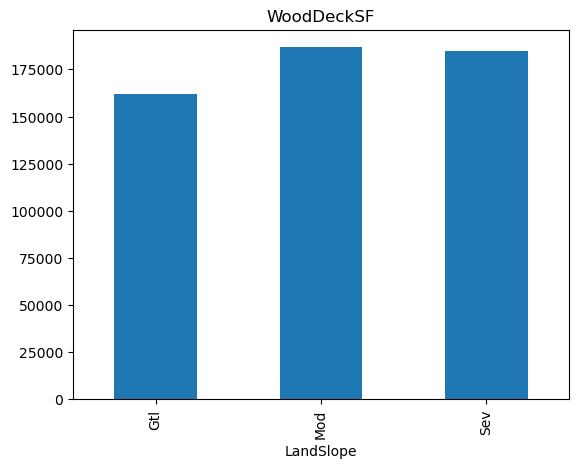

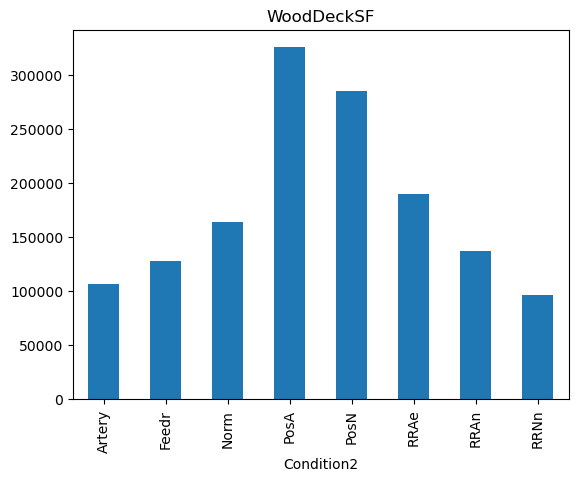

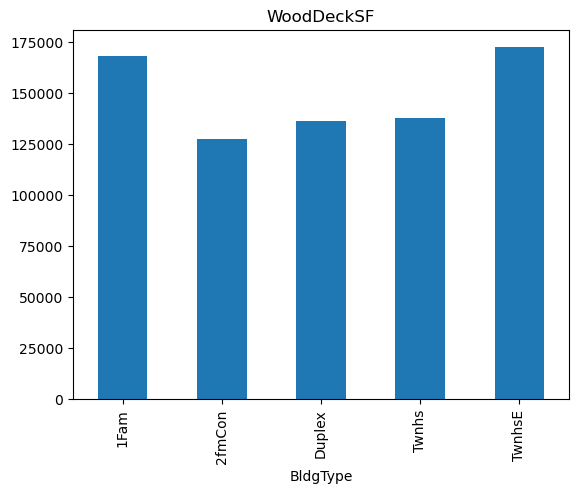

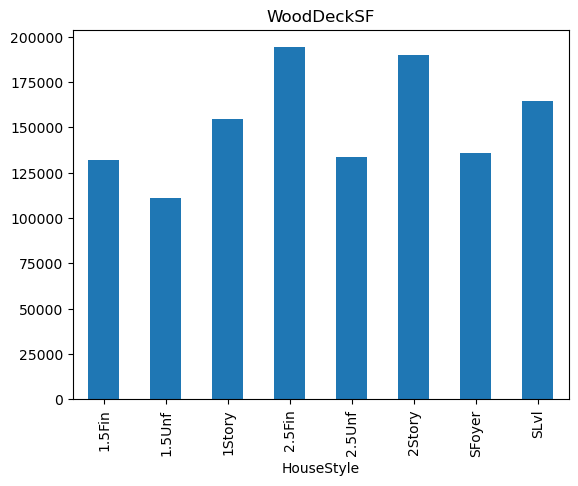

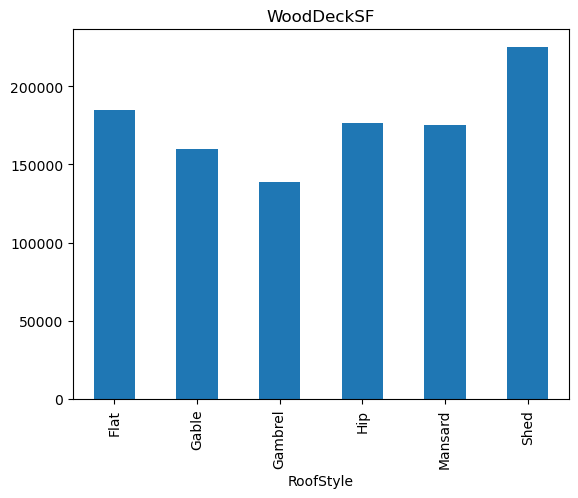

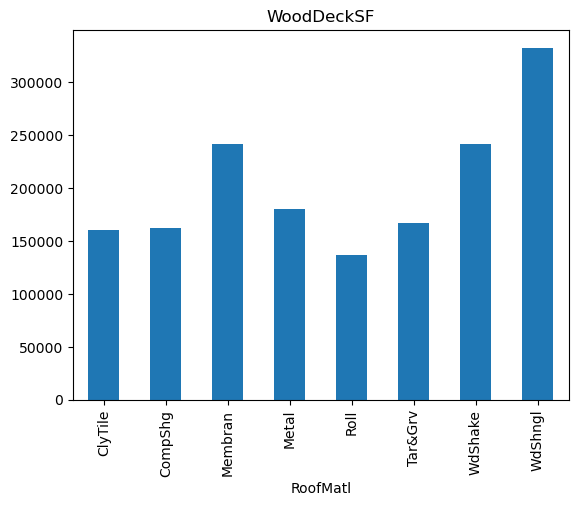

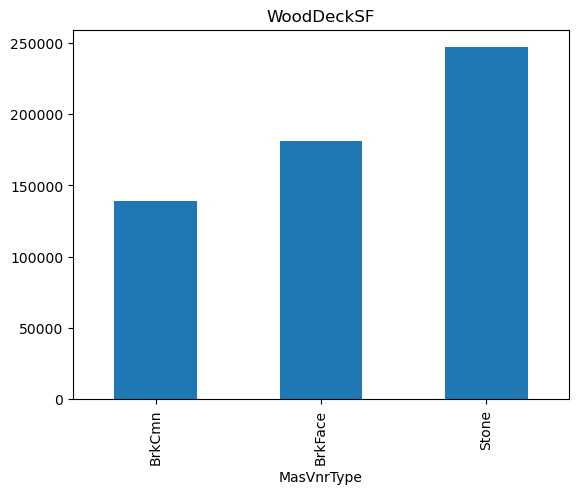

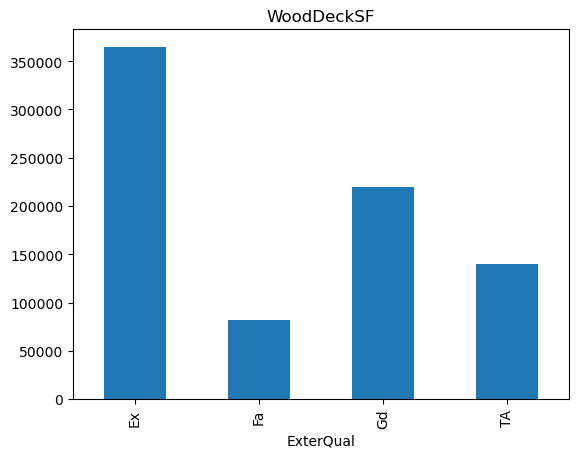

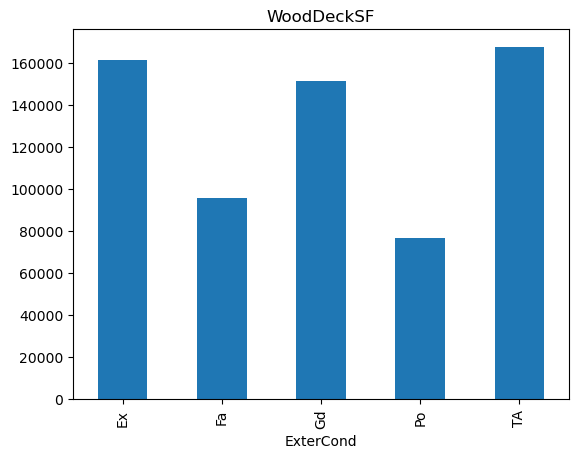

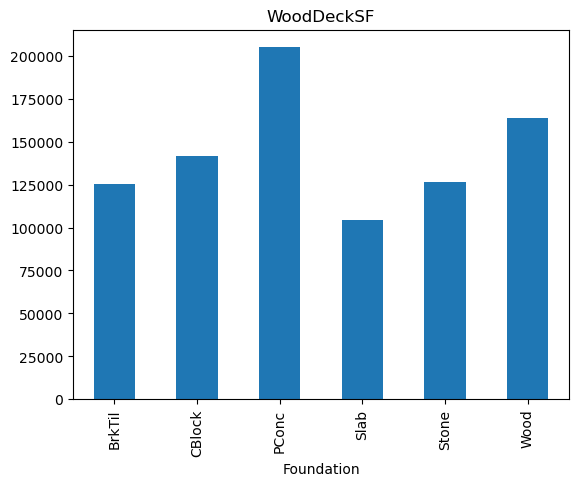

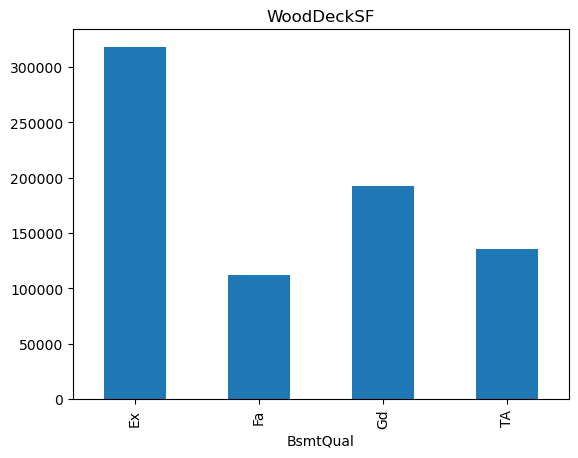

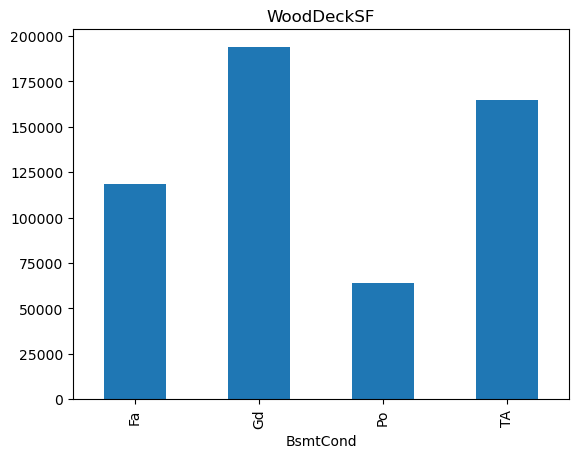

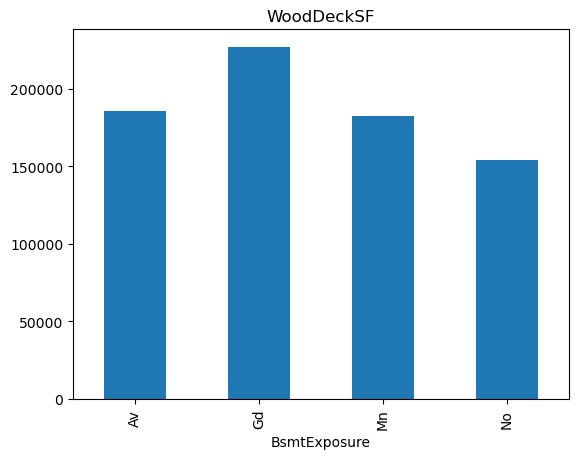

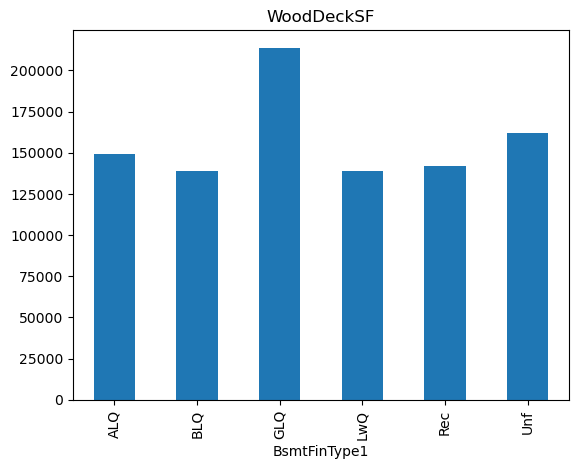

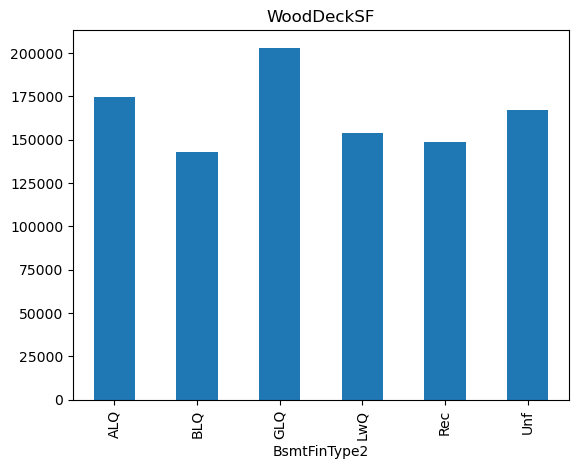

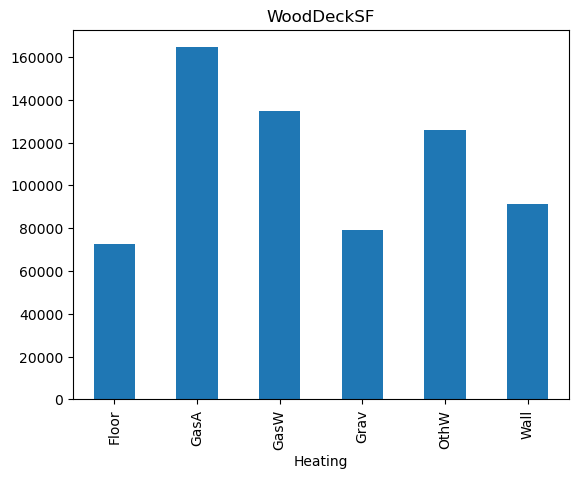

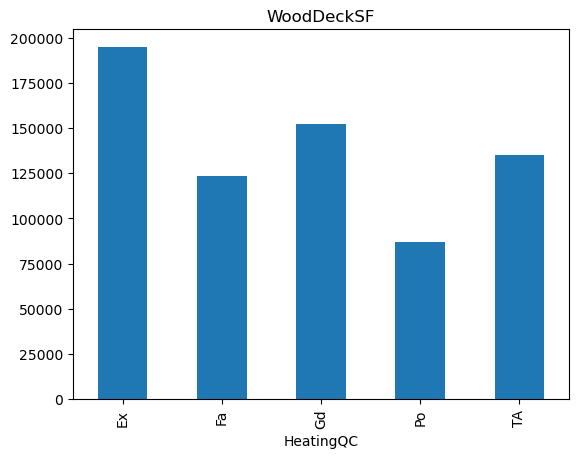

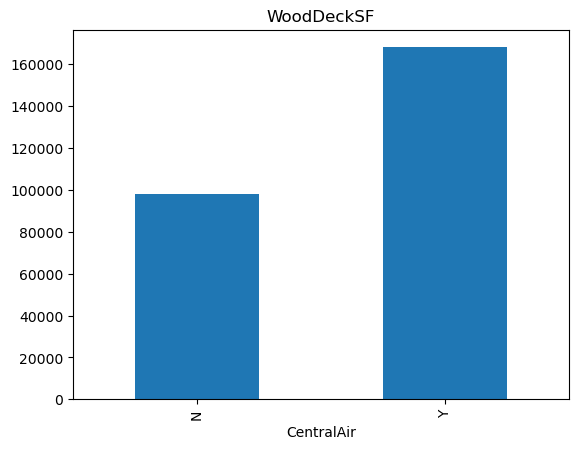

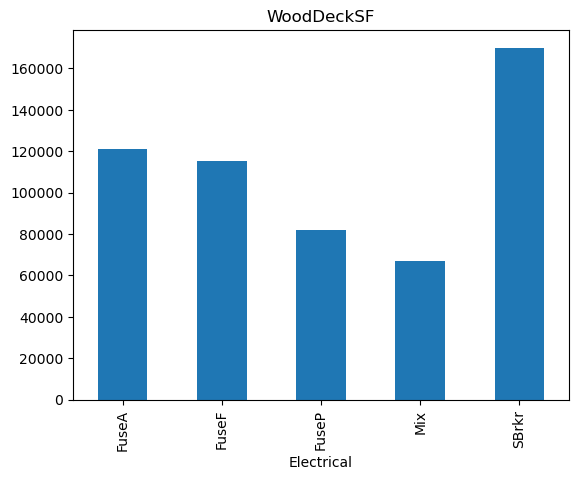

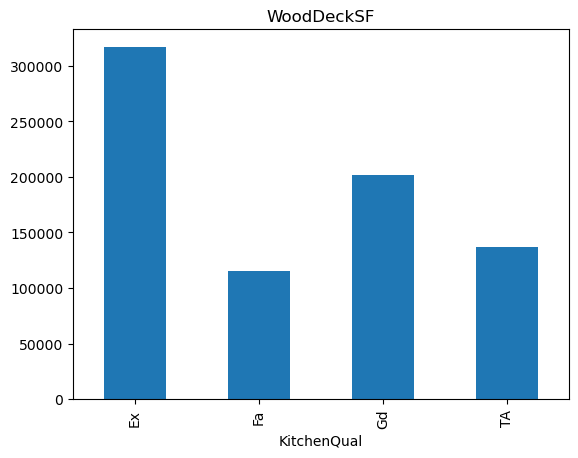

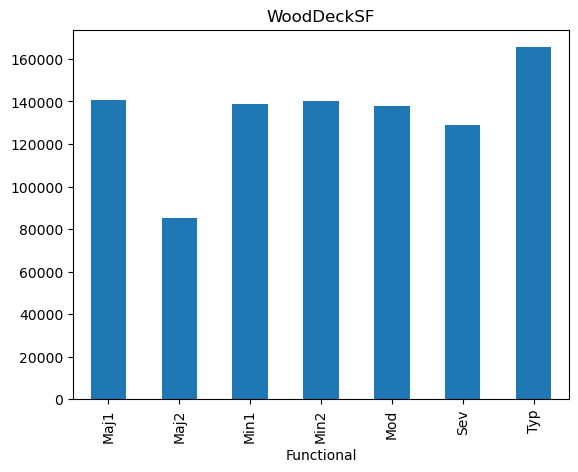

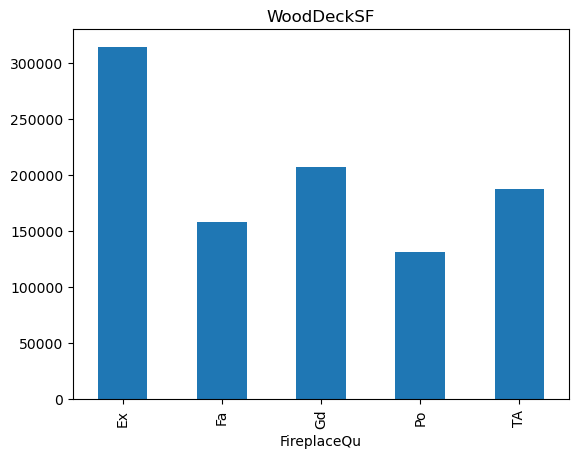

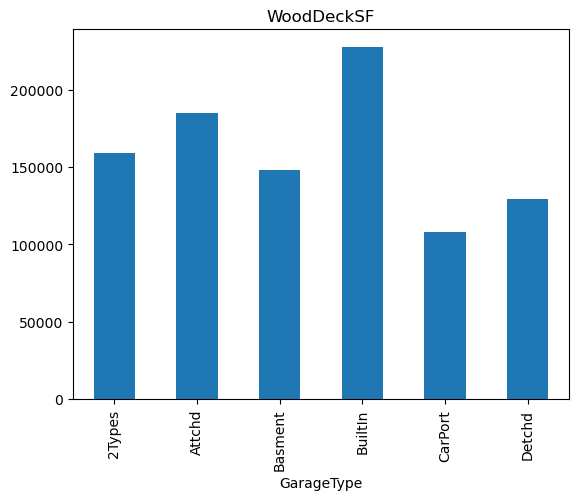

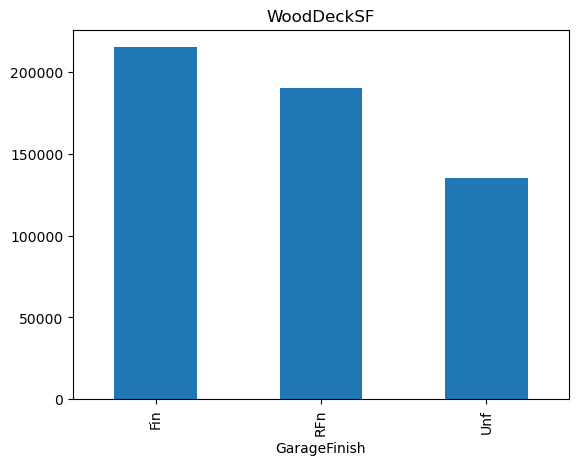

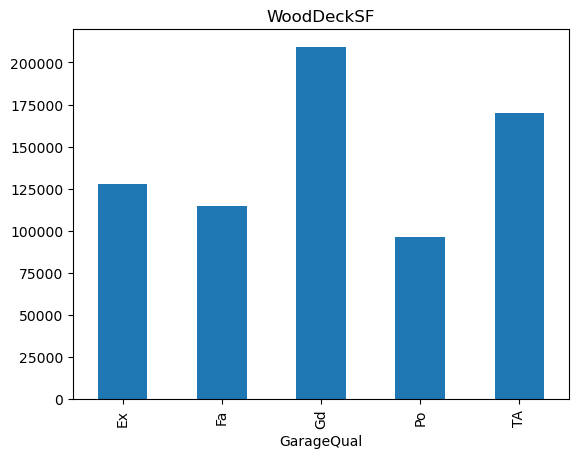

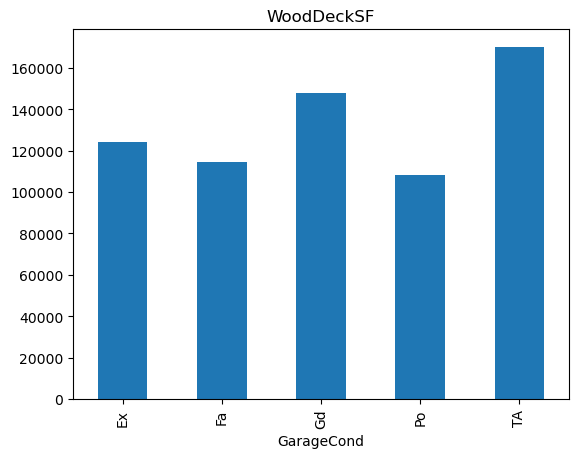

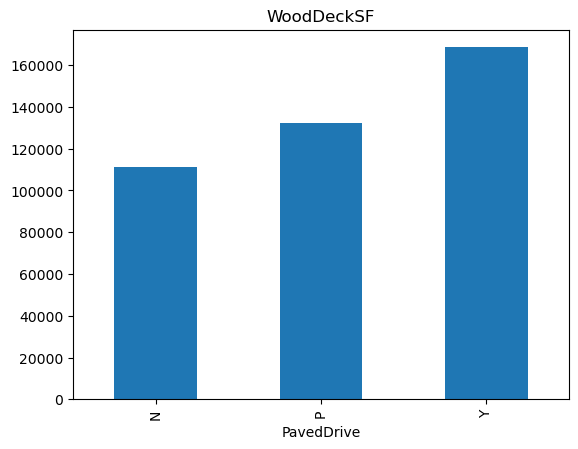

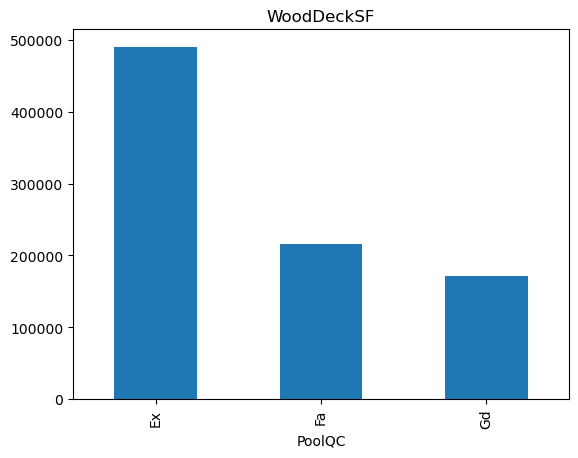

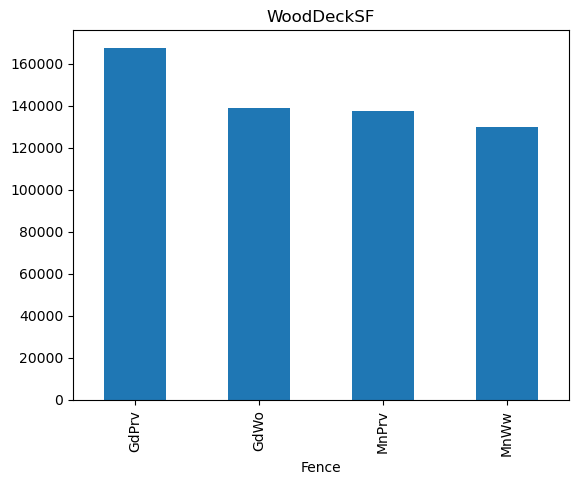

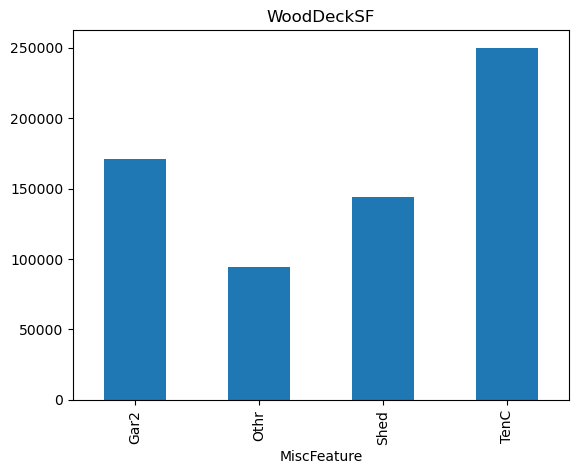

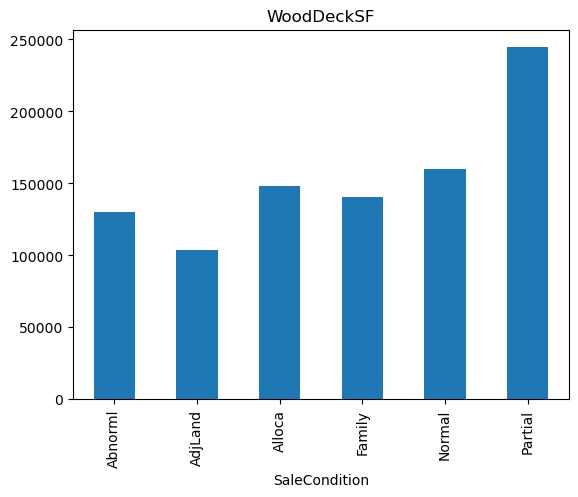

In [151]:
for feuture in String_feuture:
    if len(data[feuture].unique())>8:
        pass
    else:
        data.groupby(feuture)['SalePrice'].median().plot.bar()
        #data[feuture].hist(bins=25)
        plt.title(feauture)
        plt.show()
        

In [164]:
date_time_feature

['YrSold', 'YearBuilt', 'YearRemodAdd']

In [165]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [166]:
numericale_with_na

[]

In [168]:
len(feature_numerical)

38

In [2]:
integare_features

NameError: name 'integare_features' is not defined